# TODO

In [1]:
import bsoid_ipynb_header
from bsoid.pipeline import *
#
from bhtsne import tsne as TSNE_bhtsne
from sklearn import mixture
from sklearn.manifold import TSNE as TSNE_sklearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from typing import List
import cv2
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
#
import bsoid
from bsoid import config

In [4]:
in_memory_name = 'InMemoryName';
pipeline_savefile_name = 'pipelineSaveName200'
save_dir = 'C:\\Users\\killian\\Pictures'
p_loc = "C:\\Users\\killian\\Pictures\\prime11.pipeline"
test_file_1 = "C:\\Users\\killian\\projects\\OST-with-DLC\\bsoid_train_videos\\Video1DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv"
test_file_2 = "C:\\Users\\killian\\projects\\OST-with-DLC\\bsoid_train_videos\\Video2DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv"
test_file_3 = "C:\\Users\\killian\\projects\\OST-with-DLC\\bsoid_test_videos\\Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv"
test_file_4 = "C:\\Users\\killian\\projects\\OST-with-DLC\\bsoid_test_videos\\Video4DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv"
ex_vid_1_path = f"C:\\Users\\killian\\projects\\B-SOID\\examples\\group1_example_1.avi"
for _path in (test_file_1, test_file_2, test_file_3, test_file_4, ex_vid_1_path):
    assert os.path.isfile(_path)

In [5]:
p = bsoid.pipeline.PipelinePrime(pipeline_savefile_name).save(save_dir)

2020-10-14 17:14:39,720 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Attempting to save pipeline to the following folder: C:\Users\killian\Pictures.
2020-10-14 17:14:39,721 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Pipeline (pipelineSaveName200) saved to: C:\Users\killian\Pictures\pipelineSaveName200.pipeline


In [6]:
p = p.add_train_data_source(test_file_1, test_file_2).add_predict_data_source(test_file_3, test_file_4).save()
p = p.save()

2020-10-14 17:14:51,214 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Added file to predict data: C:\Users\killian\projects\OST-with-DLC\bsoid_test_videos\Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv
2020-10-14 17:14:51,330 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Added file to predict data: C:\Users\killian\projects\OST-with-DLC\bsoid_test_videos\Video4DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv
2020-10-14 17:14:51,331 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - WARNING  - Trying to add in an invalid set of itemsm: ()
2020-10-14 17:14:51,331 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Attempting to save pipeline to the following folder: C:\Users\killian\Pictures.
2020-10-14 17:14:51,333 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Pipeline (pipelineSaveName200) saved to: C:\Users\killian\Pictures\pipelineSaveName200.pipeline
2020-10-14 17:14:51,333 - C:\Users\killian\p

In [ ]:
p._has_unengineered_predict_data

In [7]:
p = p.build_and_predict().save()

2020-10-14 17:15:17,931 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Now entering: PipelinePrime.build_and_predict().
2020-10-14 17:15:17,931 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Now entering: PipelinePrime.build().
2020-10-14 17:15:17,932 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Now entering: PipelinePrime.build_classifier().
2020-10-14 17:15:18,064 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - build_classifier(): Start engineering features
2020-10-14 17:15:18,065 - C:\Users\killian\projects\B-SOID\bsoid\pipeline.py - DEBUG    - Now entering: PipelinePrime.engineer_features_train().
2020-10-14 17:15:18,089 - bsoid.feature_engineering           - DEBUG    - adaptively_filter_dlc_output(): Computing data threshold to forward fill any sub-threshold (x,y)...
adaptively_filter_dlc_output(): Adaptively filtering DLC feature 0...: 100%|██████████| 6/6 [00:00<00:00, 11.52it/s]
2020-10-14 17:15:18,64

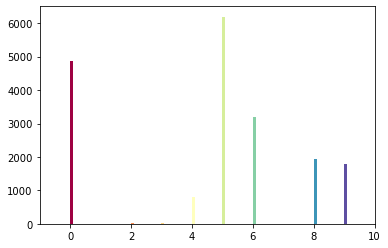

In [8]:
fig, ax = bsoid.visuals.plot_assignment_distribution_histogram(p.df_features_train_scaled[p.svm_assignment_col_name])
plt.show()

In [9]:
np.unique(p.df_features_predict_scaled[p.svm_assignment_col_name].values)

array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=int64)

In [ ]:
p.df_features_train_scaled.head()

In [ ]:
p.df_features_train_scaled.svm_assignment.dtype

In [ ]:
# p.df_features_predict_scaled.head()

In [ ]:

# p = bsoid.io.read_pipeline(p_loc)
# p = bsoid.pipeline.PipelinePrime(pipeline_savefile_name).add_train_data_source(test_file_1).add_predict_data_source(test_file_3).save()

In [ ]:
raise Exception()